In [201]:
#Steps to Predict Startup Growth with the Introduction of Starbucks
# 1. Load and Display Excel Data

In [202]:
import pandas as pd
import os

# Load the Excel file
file_path = 'D_I_2_j23_HH.xlsx'
data = pd.read_excel(file_path, sheet_name=None)
sheet_names = data.keys()
print("Sheet names:", sheet_names)

Sheet names: dict_keys(['VO_1', 'VO_2', 'VO_3', 'VO_4', 'VO_5', 'TG_1', 'T1_1', 'T2_1', 'T3_1', 'T4_1', 'T5_1', 'T6_1', 'T7_1', 'T8_1', 'T9_1', 'T10u11_1', 'T12_1'])


In [203]:
# Display the first few rows of T10u11_1 and T1_1 sheets
if 'T1_1' in data:
    t1_1 = data['T1_1']
    print("T1_1 sheet preview:")
    display(t1_1.head())
else:
    print("T1_1 sheet not found in the Excel file.")

T1_1 sheet preview:


,1. Gewerbeanzeigen in Hamburg 2010 bis 2023 und im Jahr 2023 nach Monaten,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jahr\n\nMonat,Gewerbeanmeldungen1,NaN,NaN,Gewerbeabmeldungen1,NaN,NaN
2,NaN,insgesamt,Veränderung gegenüber Vorjahr,darunter \nNeuerrichtungen,insgesamt,Veränderung gegenüber Vorjahr,darunter\nAufgabe
3,NaN,Anzahl,%,Anzahl,Anzahl,%,Anzahl
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# 2. Clean and Structure Data

In [205]:
# Clean and structure T10u11_1 sheet
t10u11_1 = data['T10u11_1']

t10u11_1_cleaned = t10u11_1.dropna(how='all').reset_index(drop=True)
t10u11_1_cleaned.columns = ['district', 'total_registrations', 'registrations_change_percent', 'new_registrations', 'total_deregistrations', 'deregistrations_change_percent', 'closures']
t10u11_1_cleaned = t10u11_1_cleaned.drop([0, 1, 2]).reset_index(drop=True)
t10u11_1_cleaned = t10u11_1_cleaned[t10u11_1_cleaned['total_registrations'].astype(str).str.isnumeric()]
t10u11_1_cleaned = t10u11_1_cleaned.astype({
    'total_registrations': int,
    'registrations_change_percent': float,
    'new_registrations': int,
    'total_deregistrations': int,
    'deregistrations_change_percent': float,
    'closures': int
})
display(t10u11_1_cleaned.head(20))


,district,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,Hamburg Mitte,6604,44.318182,6001,3900,6.615637,3408
1,Altona,2649,4.291339,2305,1887,8.573072,1610
2,Eimsbüttel,2406,3.306140,2148,1732,5.033354,1475
3,Hamburg Nord,3178,32.416667,2824,2026,6.351706,1694
4,Wandsbek,3914,9.146682,3525,3045,8.401566,2639
5,Bergedorf,1126,-5.059022,1036,897,2.164009,795
6,Harburg,1461,10.849772,1341,1148,3.330333,1011
7,Hamburg,21338,18.974073,19180,14635,6.451848,12632
14,Hamburg Mitte,5957,2365.000000,3592,3349,827.000000,2522
15,Altona,2281,719.000000,1562,1584,374.000000,1210


In [206]:
# Split the DataFrame into two
business_reg_dereg_2023 = t10u11_1_cleaned.iloc[:7].reset_index(drop=True)
new_establishments_complete_closures_2023 = t10u11_1_cleaned.iloc[8:15].reset_index(drop=True)

new_establishments_complete_closures_2023.columns = ['district', 'total_startups', 'total_new_business_startups', 'other_startups', 'total_complete_tasks', 'total_complete_business_tasks', 'total_complete_other_tasks']



In [207]:
business_reg_dereg_2023

,district,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,Hamburg Mitte,6604,44.318182,6001,3900,6.615637,3408
1,Altona,2649,4.291339,2305,1887,8.573072,1610
2,Eimsbüttel,2406,3.306140,2148,1732,5.033354,1475
3,Hamburg Nord,3178,32.416667,2824,2026,6.351706,1694
4,Wandsbek,3914,9.146682,3525,3045,8.401566,2639
5,Bergedorf,1126,-5.059022,1036,897,2.164009,795
6,Harburg,1461,10.849772,1341,1148,3.330333,1011


In [208]:
new_establishments_complete_closures_2023

,district,total_startups,total_new_business_startups,other_startups,total_complete_tasks,total_complete_business_tasks,total_complete_other_tasks
0,Hamburg Mitte,5957,2365.0,3592,3349,827.0,2522
1,Altona,2281,719.0,1562,1584,374.0,1210
2,Eimsbüttel,2142,608.0,1534,1460,315.0,1145
3,Hamburg Nord,2805,758.0,2047,1670,386.0,1284
4,Wandsbek,3502,703.0,2799,2609,461.0,2148
5,Bergedorf,1032,171.0,861,792,131.0,661
6,Harburg,1329,339.0,990,999,200.0,799


In [209]:
# Clean and structure T1_1 sheet
t1_1 = data['T1_1']
t1_1_cleaned = t1_1.dropna(how='all').reset_index(drop=True)

# Renaming columns (adjust the column names as needed)
t1_1_cleaned.columns = ['year_month', 'total_registrations', 'registrations_change_percent', 'new_registrations', 'total_deregistrations', 'deregistrations_change_percent', 'closures']

# Dropping unnecessary rows, assuming first few rows are to be removed similarly to T10u11_1
t1_1_cleaned = t1_1_cleaned.drop([0, 1, 2]).reset_index(drop=True)

# Filtering the data to include only numeric values in 'total_registrations' column
t1_1_cleaned = t1_1_cleaned[t1_1_cleaned['total_registrations'].astype(str).str.isnumeric()]

# Converting data types
t1_1_cleaned = t1_1_cleaned.astype({
    'total_registrations': int,
    'registrations_change_percent': float,
    'new_registrations': int,
    'total_deregistrations': int,
    'deregistrations_change_percent': float,
    'closures': int
})

# Display the cleaned data
display(t1_1_cleaned.head(20))


,year_month,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,2010,24632,10.705618,22046,16460,-4.524362,14163
1,2011,24495,-0.556187,21777,17629,7.102066,15213
2,2012,22618,-7.700000,19945,18032,2.300000,15567
3,2013,22743,0.600000,20029,17968,-0.400000,15333
4,2014,20264,-10.900057,17706,18219,1.396928,15684
5,2015,20162,-0.503356,17566,17058,-6.372468,14703
6,2016,19798,-1.805376,17492,16329,-4.273655,14120
7,2017,20105,1.550662,17874,16407,0.477678,14259
8,2018,19880,-1.119125,17558,15450,-5.832876,13328
9,2019,20454,2.887324,18108,16441,6.414239,14135


In [210]:
# Split the DataFrame into two
year_wise = t1_1_cleaned.iloc[:14].reset_index(drop=True)
month_wise = t1_1_cleaned.iloc[15:].reset_index(drop=True)

In [211]:
year_wise

,year_month,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,2010,24632,10.705618,22046,16460,-4.524362,14163
1,2011,24495,-0.556187,21777,17629,7.102066,15213
2,2012,22618,-7.700000,19945,18032,2.300000,15567
3,2013,22743,0.600000,20029,17968,-0.400000,15333
4,2014,20264,-10.900057,17706,18219,1.396928,15684
5,2015,20162,-0.503356,17566,17058,-6.372468,14703
6,2016,19798,-1.805376,17492,16329,-4.273655,14120
7,2017,20105,1.550662,17874,16407,0.477678,14259
8,2018,19880,-1.119125,17558,15450,-5.832876,13328
9,2019,20454,2.887324,18108,16441,6.414239,14135


In [212]:
month_wise

,year_month,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,Februar,1713,6.596142,1542,1197,2.395210,1024
1,März,1708,8.720560,1532,1203,-7.390300,1009
2,April,1739,9.096612,1580,944,18.147685,818
3,Mai,1565,0.578406,1409,1025,-6.987296,894
4,Juni,1697,18.588400,1532,1358,32.101167,1174
5,Juli,1624,27.472527,1430,1142,20.464135,989
6,August,1718,24.043321,1549,1147,18.860104,982
7,September,1739,27.961737,1580,1076,16.450216,932
8,Oktober,1993,44.945455,1808,1223,15.814394,1070
9,November,1706,14.959569,1534,1330,-1.188707,1161


In [226]:
# Clean and structure T1_1 sheet
t1_1 = data['T1_1']
t1_1_cleaned = t1_1.dropna(how='all').reset_index(drop=True)

# Renaming columns (adjust the column names as needed)
t1_1_cleaned.columns = ['year_month', 'total_registrations', 'registrations_change_percent', 'new_registrations', 'total_deregistrations', 'deregistrations_change_percent', 'closures']

# Dropping unnecessary rows, assuming first few rows are to be removed similarly to T10u11_1
t1_1_cleaned = t1_1_cleaned.drop([0, 1, 2]).reset_index(drop=True)

# Filtering the data to include only numeric values in 'total_registrations' column
t1_1_cleaned = t1_1_cleaned[t1_1_cleaned['total_registrations'].astype(str).str.isnumeric()]

# Converting data types
t1_1_cleaned = t1_1_cleaned.astype({
    'total_registrations': str,
    'registrations_change_percent': float,
    'new_registrations': int,
    'total_deregistrations': int,
    'deregistrations_change_percent': float,
    'closures': int
})

# Display the cleaned data
display(t1_1_cleaned.head(20))

,year_month,total_registrations,registrations_change_percent,new_registrations,total_deregistrations,deregistrations_change_percent,closures
0,2010,24632,10.705618,22046,16460,-4.524362,14163
1,2011,24495,-0.556187,21777,17629,7.102066,15213
2,2012,22618,-7.700000,19945,18032,2.300000,15567
3,2013,22743,0.600000,20029,17968,-0.400000,15333
4,2014,20264,-10.900057,17706,18219,1.396928,15684
5,2015,20162,-0.503356,17566,17058,-6.372468,14703
6,2016,19798,-1.805376,17492,16329,-4.273655,14120
7,2017,20105,1.550662,17874,16407,0.477678,14259
8,2018,19880,-1.119125,17558,15450,-5.832876,13328
9,2019,20454,2.887324,18108,16441,6.414239,14135


In [240]:
t6_1 = data['T6_1']
t6_1_cleaned = t6_1.dropna(how='all').reset_index(drop=True)

# Renaming columns (adjust the column names as needed)
t6_1_cleaned.columns = [
    'Nr_der_Klassifikation', 'Wirtschaftsgliederung', 'Gewerbeabmeldungen_insgesamt',
    'Aufgabe_insgesamt', 'vollständige_Aufgabe', 'Umwandlung', 'Fortzug',
    'Sonstige_Abmeldungen_insgesamt', 'Rechtsformwechsel', 'Gesellschafteraustritt',
    'Erbfolge_Kauf_Verpachtung'
]

#t6_1_cleaned = t6_1_cleaned.drop([0, 1, 2, 3]).reset_index(drop=True)

# Filtering the data to include only numeric values in 'Nr_der_Klassifikation' column
t6_1_cleaned = t6_1_cleaned[t6_1_cleaned['Nr_der_Klassifikation'].astype(str).str.isnumeric()]

# Converting data types
t6_1_cleaned = t6_1_cleaned.astype({
    'Nr_der_Klassifikation': str,
    'Gewerbeabmeldungen_insgesamt': int,
    'Aufgabe_insgesamt': int,
    'vollständige_Aufgabe': int,
    'Umwandlung': int,
    'Fortzug': int,
    'Sonstige_Abmeldungen_insgesamt': int,
    'Rechtsformwechsel': int,
    'Gesellschafteraustritt': int,
    'Erbfolge_Kauf_Verpachtung': int
})

In [233]:
t6_1_cleaned.head()

,Nr_der_Klassifikation,Wirtschaftsgliederung,Gewerbeabmeldungen_insgesamt,Aufgabe_insgesamt,vollständige_Aufgabe,Umwandlung,Fortzug,Sonstige_Abmeldungen_insgesamt,Rechtsformwechsel,Gesellschafteraustritt,Erbfolge_Kauf_Verpachtung
5,10,Herstellung von Nahrungs- und \nFuttermitteln,75,63,62,1,4,8,1,2,5
6,11,Getränkeherstellung,7,4,4,0,1,2,0,2,0
7,13,Herstellung von Textilien,57,51,51,0,4,2,0,2,0
8,14,Herstellung von Bekleidung,53,46,46,0,4,3,2,0,1
9,15,"Herstellung von Leder, Lederwaren \nund Schuhen",8,8,7,1,0,0,0,0,0


In [179]:
# Sample data for Starbucks locations
data = {'district': ['Hamburg Mitte', 'Altona', 'Eimsbüttel', 'Hamburg Nord', 'Wandsbek', 'Bergedorf', 'Harburg']}
starbucks_locations = pd.DataFrame(data)

In [180]:
# 3. Create and Populate SQLite Database

In [236]:
import sqlite3

db_path = 'hamburg_starbucks.db'

# Connect to SQLite database
conn = sqlite3.connect(db_path)
cur = conn.cursor()

# Create necessary tables and insert data

business_reg_dereg_2023.to_sql('business_reg_dereg_2023', conn, if_exists='replace', index=False)

new_establishments_complete_closures_2023.to_sql('new_establishments_complete_closures_2023', conn, if_exists='replace', index=False)

year_wise.to_sql('year_wise', conn, if_exists='replace', index=False)

month_wise.to_sql('month_wise', conn, if_exists='replace', index=False)

t6_1_cleaned.to_sql('business_deregistrations', conn, if_exists='replace', index=False)

conn.commit()

In [237]:
# prints out all of the columns of every table in the DB
# conn: database connection object, cursor: cursor object

def table_information(conn,cursor):

    tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from {} LIMIT 0".format(table_name), conn)
        print(table_name)
        for col in table.columns:
            print("\t "+ col)
        print()

In [238]:
table_information(conn,cur)

business_reg_dereg_2023
	 district
	 total_registrations
	 registrations_change_percent
	 new_registrations
	 total_deregistrations
	 deregistrations_change_percent
	 closures

new_establishments_complete_closures_2023
	 district
	 total_startups
	 total_new_business_startups
	 other_startups
	 total_complete_tasks
	 total_complete_business_tasks
	 total_complete_other_tasks

year_wise
	 year_month
	 total_registrations
	 registrations_change_percent
	 new_registrations
	 total_deregistrations
	 deregistrations_change_percent
	 closures

month_wise
	 year_month
	 total_registrations
	 registrations_change_percent
	 new_registrations
	 total_deregistrations
	 deregistrations_change_percent
	 closures

business_deregistrations
	 Nr_der_Klassifikation
	 Wirtschaftsgliederung
	 Gewerbeabmeldungen_insgesamt
	 Aufgabe_insgesamt
	 vollständige_Aufgabe
	 Umwandlung
	 Fortzug
	 Sonstige_Abmeldungen_insgesamt
	 Rechtsformwechsel
	 Gesellschafteraustritt
	 Erbfolge_Kauf_Verpachtung



In [239]:
cur.execute("select * from business_reg_dereg_2023  limit 5 ").fetchall()

[('Hamburg Mitte',
  6604,
  44.31818181818181,
  6001,
  3900,
  6.615636960087485,
  3408),
 ('Altona', 2649, 4.29133858267717, 2305, 1887, 8.573072497123135, 1610),
 ('Eimsbüttel', 2406, 3.3061399742378796, 2148, 1732, 5.033353547604619, 1475),
 ('Hamburg Nord',
  3178,
  32.41666666666666,
  2824,
  2026,
  6.351706036745398,
  1694),
 ('Wandsbek', 3914, 9.146681539319573, 3525, 3045, 8.401566393734427, 2639)]

In [186]:
conn.commit()
conn.close()

In [187]:
# 5. Predict Growth Based on Starbucks Presence

In [188]:
new_establishments_complete_closures_2023

,district,total_startups,total_new_business_startups,other_startups,total_complete_tasks,total_complete_business_tasks,total_complete_other_tasks
0,Hamburg Mitte,5957,2365.0,3592,3349,827.0,2522
1,Altona,2281,719.0,1562,1584,374.0,1210
2,Eimsbüttel,2142,608.0,1534,1460,315.0,1145
3,Hamburg Nord,2805,758.0,2047,1670,386.0,1284
4,Wandsbek,3502,703.0,2799,2609,461.0,2148
5,Bergedorf,1032,171.0,861,792,131.0,661
6,Harburg,1329,339.0,990,999,200.0,799


In [189]:
# Calculate the predicted number of additional startups

prediction = pd.DataFrame()
prediction['district'] = new_establishments_complete_closures_2023['district']
prediction['actual_startups'] = new_establishments_complete_closures_2023['total_startups']
prediction['min_additional_startups'] = new_establishments_complete_closures_2023['total_startups'] * 0.05
prediction['max_additional_startups'] = new_establishments_complete_closures_2023['total_startups'] * 0.118

prediction['total_new_business_startups'] = new_establishments_complete_closures_2023['total_new_business_startups']
prediction['min_additional_business_startups'] = new_establishments_complete_closures_2023['total_new_business_startups'] * 0.05
prediction['max_additional_business_startups'] = new_establishments_complete_closures_2023['total_new_business_startups'] * 0.118

prediction['total_other_startups'] = new_establishments_complete_closures_2023['other_startups']
prediction['min_other_startups'] = new_establishments_complete_closures_2023['other_startups'] * 0.05
prediction['max_other_startups'] = new_establishments_complete_closures_2023['other_startups'] * 0.118



In [190]:
prediction

,district,actual_startups,min_additional_startups,max_additional_startups,total_new_business_startups,min_additional_business_startups,max_additional_business_startups,total_other_startups,min_other_startups,max_other_startups
0,Hamburg Mitte,5957,297.85,702.926,2365.0,118.25,279.070,3592,179.60,423.856
1,Altona,2281,114.05,269.158,719.0,35.95,84.842,1562,78.10,184.316
2,Eimsbüttel,2142,107.10,252.756,608.0,30.40,71.744,1534,76.70,181.012
3,Hamburg Nord,2805,140.25,330.990,758.0,37.90,89.444,2047,102.35,241.546
4,Wandsbek,3502,175.10,413.236,703.0,35.15,82.954,2799,139.95,330.282
5,Bergedorf,1032,51.60,121.776,171.0,8.55,20.178,861,43.05,101.598
6,Harburg,1329,66.45,156.822,339.0,16.95,40.002,990,49.50,116.820


In [191]:
# 6. Plot Predicted Growth of Startups


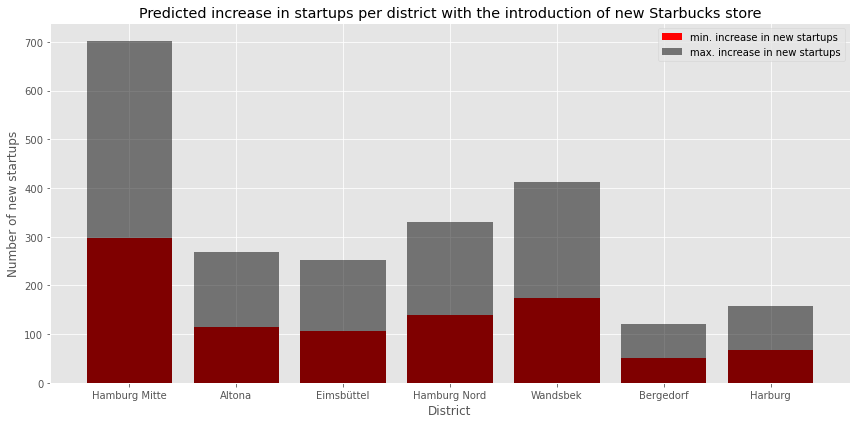

In [255]:
import matplotlib.pyplot as plt

# Plotting the predicted growth
plt.figure(figsize=(12, 6))
plt.bar(prediction['district'], prediction['min_additional_startups'], color='red', label='min. increase in new startups')
plt.bar(prediction['district'],prediction['max_additional_startups'], color='black', alpha=0.5, label='max. increase in new startups')
plt.xlabel('District')
plt.ylabel('Number of new startups')
plt.title('Predicted increase in startups per district with the introduction of new Starbucks store')
plt.legend()

plt.tight_layout()
plt.show()

In [250]:
prediction.to_excel('predicted_growth.xlsx',index=False)

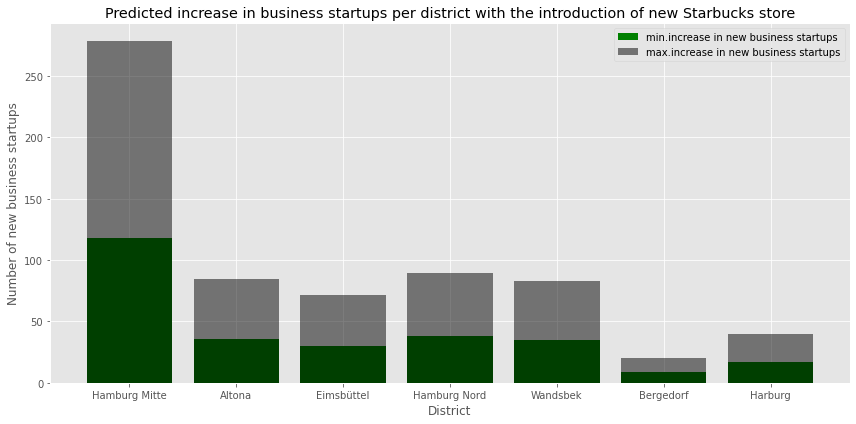

In [256]:
import matplotlib.pyplot as plt

# Plotting the predicted growth
plt.figure(figsize=(12, 6))
plt.bar(prediction['district'], prediction['min_additional_business_startups'], color='green', label='min.increase in new business startups')
plt.bar(prediction['district'],prediction['max_additional_business_startups'], color='black', alpha=0.5, label='max.increase in new business startups')
plt.xlabel('District')
plt.ylabel('Number of new business startups')
plt.title('Predicted increase in business startups per district with the introduction of new Starbucks store')
plt.legend()

plt.tight_layout()
plt.show()

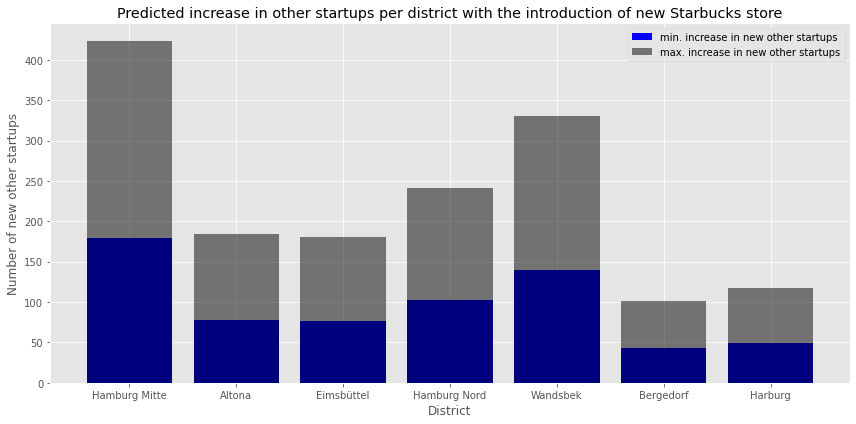

In [258]:
import matplotlib.pyplot as plt

# Plotting the predicted growth
plt.figure(figsize=(12, 6))
plt.bar(prediction['district'], prediction['min_other_startups'], color='blue', label='min. increase in new other startups')
plt.bar(prediction['district'],prediction['max_other_startups'], color='black', alpha=0.5, label='max. increase in new other startups')
plt.xlabel('District')
plt.ylabel('Number of new other startups')
plt.title('Predicted increase in other startups per district with the introduction of new Starbucks store')
plt.legend()
plt.tight_layout()
plt.show()